In [1]:
import empiricaldist as ed
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
hypos = np.linspace(0, 1, 101)
hypos

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

# Bayesian Estimation

In [3]:
df = pd.DataFrame(index=hypos)
df

""
0.00
0.01
0.02
0.03
0.04
...
0.96
0.97
0.98
0.99


In [4]:
df['prior']=[1]*101
df.head()

,prior
0.00,1
0.01,1
0.02,1
0.03,1
0.04,1


In [5]:
likelihood_heads = hypos
likelihood_tails = 1-hypos

print(likelihood_tails)

[1.   0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87
 0.86 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73
 0.72 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62 0.61 0.6  0.59
 0.58 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48 0.47 0.46 0.45
 0.44 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34 0.33 0.32 0.31
 0.3  0.29 0.28 0.27 0.26 0.25 0.24 0.23 0.22 0.21 0.2  0.19 0.18 0.17
 0.16 0.15 0.14 0.13 0.12 0.11 0.1  0.09 0.08 0.07 0.06 0.05 0.04 0.03
 0.02 0.01 0.  ]


In [6]:
likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails
}

In [7]:
likelihood

{'H': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 'T': array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
        0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
        0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
        0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
      

#### Simulate 250 Coin Toss
- 140 Heads
- 110 Tails

In [8]:
dataset = 'H' * 140 + 'T' * 110

In [9]:
dataset

'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT'

In [10]:
def update_euro(pmf, dataset):
    for data in dataset:
        # pmf represent prior
        pmf = pmf * likelihood[data]
    pmf = pmf/pmf.sum()
    df['posterior_2']= pmf

In [11]:
df['posterior_1'] = df['prior']

In [12]:
update_euro(df['posterior_1'], dataset)

In [13]:
df

,prior,posterior_1,posterior_2
0.00,1,1,0.000000e+00
0.01,1,1,1.256330e-207
0.02,1,1,5.731921e-166
0.03,1,1,8.338711e-142
0.04,1,1,8.269265e-125
...,...,...,...
0.96,1,1,2.107677e-83
0.97,1,1,1.624102e-96
0.98,1,1,2.911941e-115
0.99,1,1,9.293081e-148


Text(0.5, 0, 'Proportion of heads')

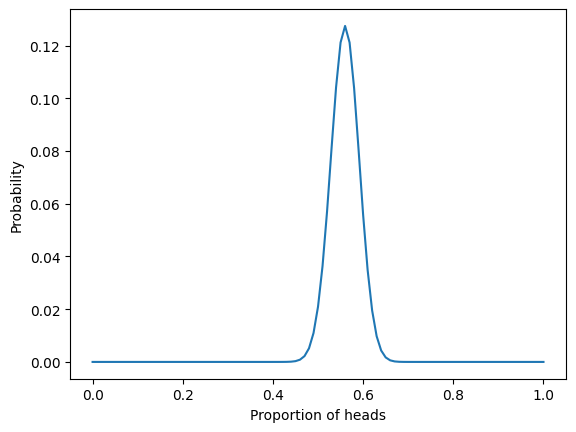

In [14]:
plt.plot(df['posterior_2'])
plt.ylabel('Probability')
plt.xlabel('Proportion of heads')

In [15]:
df.idxmax()

prior          0.00
posterior_1    0.00
posterior_2    0.56
dtype: float64

The figure shows the posterior distribution of x, which is the proportion of heads for the coin we observed.<br/>
The posterior distribution represents our beliefs about x after seeing the data. It indicates that values less than 0.4 and greater than 0.7 are unlikely; values between 0.5 and 0.6 are the most likely.<br/>
According to max probability, the most likely value for x is 0.56, which is the proportion of heads in the dataset, 140/250.

## The Binomial Likelihood Function

The example above, we have been computing the updates one spin at a time, so for the Euro Problem we have to do 250 update.<br/>
A more efficient alternative is to compute the likelihood of the entire dataset at once.

In [16]:
ed.Pmf(1,np.linspace(0,1,10)).qs

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [17]:
df.index.to_numpy()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [18]:
def update_binomial(pmf, data):
    k, n, = data
    xs = df.index.to_numpy()
    likelihood = stats.binom.pmf(k=k, n=n, p=xs)
    pmf = pmf*likelihood
    pmf = pmf/pmf.sum()
    df['posterior_3']=pmf

In [19]:
# let say for 140 heads out of 250 coin toss
data = 140, 250

In [20]:
df.head()

,prior,posterior_1,posterior_2
0.00,1,1,0.000000e+00
0.01,1,1,1.256330e-207
0.02,1,1,5.731921e-166
0.03,1,1,8.338711e-142
0.04,1,1,8.269265e-125


In [21]:
update_binomial(stats.uniform.pdf([1]*101), data)

In [22]:
df.head(10)

,prior,posterior_1,posterior_2,posterior_3
0.00,1,1,0.000000e+00,0.000000e+00
0.01,1,1,1.256330e-207,1.256330e-207
0.02,1,1,5.731921e-166,5.731921e-166
0.03,1,1,8.338711e-142,8.338711e-142
0.04,1,1,8.269265e-125,8.269265e-125
0.05,1,1,9.652275e-112,9.652275e-112
0.06,1,1,3.668356e-101,3.668356e-101
0.07,1,1,2.667365e-92,2.667365e-92
0.08,1,1,1.067804e-84,1.067804e-84
0.09,1,1,4.653042e-78,4.653042e-78


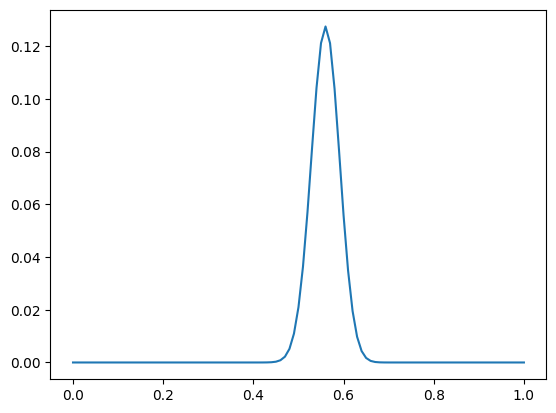

In [23]:
plt.plot(df['posterior_3'])

In [24]:
df.idxmax()

prior          0.00
posterior_1    0.00
posterior_2    0.56
posterior_3    0.56
dtype: float64

#### The Odd (Chance)

p / (1-p)

In [25]:
0.56/(1-0.56)

1.272727272727273

Out of 250 coin toss, the chance of getting heads is 1.27 times of getting tails

## Estimating Counts

#### The Train Problem

A railroad numbers its locomotives in order 1 ... N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.<br/><br/>
Based on the observation, we know the railroad has 60 or more locomotives. But how many more? To apply Bayessian reasoning, we can break this problem into two steps:
- What did we know about N before we saw the data? (prior)
- For any given value of N, what is the likelihood of seeing the data (a locomotive with number 60)? (likelihood)

We don't have much basis to choose a prior, so we'll start with something simple and then consider alternatives. Let's assume that N is equally likely to be any value from 1 to 1000.

In [26]:
hypos = np.arange(1,1001)
df = pd.DataFrame([1]*1000, columns=['prior'], index=hypos)
df.head()

,prior
1,1
2,1
3,1
4,1
5,1


In [27]:
def update_train(pmf, data):
    # update pmf (prior) based on new data
    hypos = pmf.index.to_numpy()
    likelihood = 1 / hypos
    impossible = (data > hypos) # since the observed value is 60, so there is no chance that the train is less than 60
    likelihood[impossible] = 0 # change the likelihood for N < 60
    pmf = pmf * likelihood
    pmf = pmf / pmf.sum()
    df['posterior_1'] = pmf
    return df

In [28]:
data  = 60

In [29]:
update_train(df['prior'], data)

,prior,posterior_1
1,1,0.000000
2,1,0.000000
3,1,0.000000
4,1,0.000000
5,1,0.000000
...,...,...
996,1,0.000356
997,1,0.000355
998,1,0.000355
999,1,0.000355


In [30]:
1/hypos[(data>hypos)]

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
       0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
       0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ,
       0.03846154, 0.03703704, 0.03571429, 0.03448276, 0.03333333,
       0.03225806, 0.03125   , 0.03030303, 0.02941176, 0.02857143,
       0.02777778, 0.02702703, 0.02631579, 0.02564103, 0.025     ,
       0.02439024, 0.02380952, 0.02325581, 0.02272727, 0.02222222,
       0.02173913, 0.0212766 , 0.02083333, 0.02040816, 0.02      ,
       0.01960784, 0.01923077, 0.01886792, 0.01851852, 0.01818182,
       0.01785714, 0.01754386, 0.01724138, 0.01694915])

In [31]:
len(1/hypos[(data>hypos)])

59

In [32]:
df[df['posterior_1']>0]

,prior,posterior_1
60,1,0.005905
61,1,0.005809
62,1,0.005715
63,1,0.005624
64,1,0.005536
...,...,...
996,1,0.000356
997,1,0.000355
998,1,0.000355
999,1,0.000355


Text(0, 0.5, 'Probability')

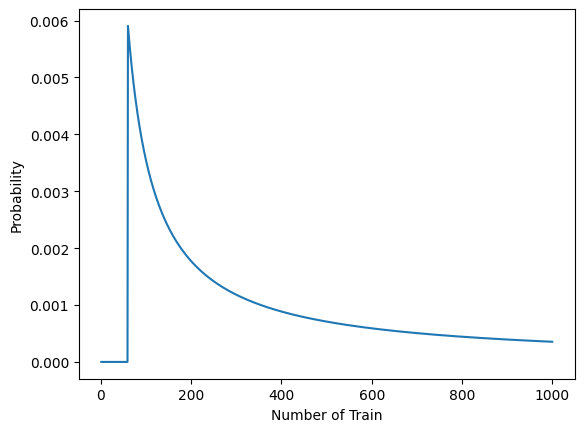

In [33]:
plt.plot(df['posterior_1'])
plt.xlabel('Number of Train')
plt.ylabel('Probability')

In [34]:
df.idxmax()

prior           1
posterior_1    60
dtype: int64

The most likely value, if you had to guess, is 60

An alternative is to compute the mean of the posterior distribution.<br/>
mean = Total of pi*qi
<br/>
Where:
- pi is the number of N
- qi is the posterior probability

In [35]:
np.sum(df.index.to_numpy()*df['posterior_1'])

np.float64(333.41989326370776)

Text(0, 0.5, 'Probability')

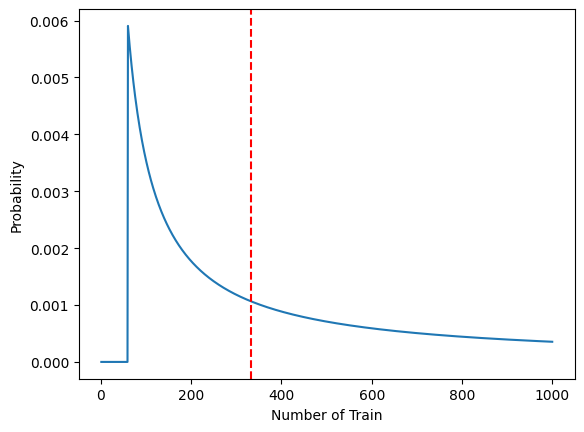

In [36]:
plt.plot(df['posterior_1'])
plt.axvline(333, linestyle='--', color='red')
plt.xlabel('Number of Train')
plt.ylabel('Probability')

The mean of the posterior is 333, so that might be a good guess if you want to minimize error. If you played this guessing game over and over, using the mean of the posterior as your estimate would minimize the mean squared error over the long run

### Sensitivity to the Prior

The prior we used in the previous example is uniform from 1 to 1000, what if we vary the upper bound? Will the posterior mean be the same or small difference?

In [37]:
def update_posterior(prior, data):
    hypos = df.index.to_numpy()
    likelihood = 1/hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    posterior = prior * likelihood
    posterior = posterior/posterior.sum()
    df['posterior']=posterior

In [38]:
# upper bound 500
hypos = np.arange(0,501)
df = pd.DataFrame([1]*501, index=hypos, columns=['prior'])
df.head()

,prior
0,1
1,1
2,1
3,1
4,1


In [39]:
update_posterior(df['prior'], data)
np.sum(df.index*df['posterior'])

/tmp/ipykernel_1039/2749579168.py:3: RuntimeWarning: divide by zero encountered in divide
  likelihood = 1/hypos


np.float64(207.07922798341045)

In [40]:
hypos = np.arange(0, 2001)
df = pd.DataFrame([1]*2001, index=hypos, columns=['prior'])
update_posterior(df['prior'], data)
np.sum(df.index.to_numpy()*df['posterior'])

/tmp/ipykernel_1039/2749579168.py:3: RuntimeWarning: divide by zero encountered in divide
  likelihood = 1/hypos


np.float64(552.1790171646376)

As we vary the upper bound, the posterior mean changes substantially, so that's bad.<br/>
When the posterior is sensitive to the prior, there are two ways to proceed:
- Get more data
- Get more background information and choose a better prior

With more data, posterior distributions based on diferent priors tend to converge.<br/>
For example, **suppose that in addition to train 60 we also see trains 30 and 90.**

In [41]:
def update_posterior(prior, data):
    hypos = df.index.to_numpy()
    likelihood = 1/hypos
    posterior = None
    for i in data:
        impossible = (i > hypos)
        likelihood[impossible] = 0
        if posterior is None:
            # initial posterior
            posterior = prior * likelihood
        else:
            # update posterior
            posterior = posterior * likelihood
    # normalize posterior
    posterior = posterior/posterior.sum()
    df['posterior']=posterior

In [42]:
data = [30,60,90]
hypos = np.arange(1, 501)
df = pd.DataFrame([1]*500, index=hypos, columns=['prior'])
update_posterior(df['prior'], data)
np.sum(df.index.to_numpy()*df['posterior'])

np.float64(151.84958795903836)

In [43]:
data = [30,60,90]
hypos = np.arange(1, 1001)
df = pd.DataFrame([1]*1000, index=hypos, columns=['prior'])
update_posterior(df['prior'], data)
np.sum(df.index.to_numpy()*df['posterior'])

np.float64(164.30558642273346)

In [44]:
data = [30,60,90] # the data we seen, in this case the number of trains
hypos = np.arange(1, 2001)
df = pd.DataFrame([1]*2000, index=hypos, columns=['prior'])
update_posterior(df['prior'], data)
np.sum(df.index.to_numpy()*df['posterior'])

np.float64(171.3381810915096)

After we observed three trains, the difference are smaller, but apparently three trains are not enough for the posteriors to converge.

## Power Law Prior

If more data are not available, another option is to improve the priors by gathering more background information.<br/>
Mathematically, a power law means that the number of variable with a given size, N, is proportional to (1/n)**alpha <br/>
Where alpha is a parameter that is often near 1.

In [45]:
a= 1
(1/10)**a, 10**-a

(0.1, 0.1)

In [46]:
def update_posterior(input_df, data):
    hypos = input_df.index.to_numpy()
    likelihood = 1/hypos
    posterior = None
    for datum in data:
        unlikely = (datum > hypos)
        likelihood[unlikely] = 0
        if posterior is None:
            posterior = input_df['prior'] * likelihood
        else:
            posterior = posterior * likelihood
    posterior = posterior / posterior.sum()
    input_df['posterior'] = posterior    

#### Uniform Prior

In [47]:
hypos = np.arange(1, 501)
data = [30,60,90] # assume this is the train we have seen during observation

dfu = pd.DataFrame(data=[1]*len(hypos), index=hypos, columns=['prior'])
update_posterior(dfu, data)
np.sum(dfu.index*dfu['posterior'])

np.float64(151.84958795903836)

In [48]:
hypos = np.arange(1, 1001)
data = [30,60,90]  # assume this is the train we have seen during observation

dfu = pd.DataFrame(data=[1]*len(hypos), index=hypos, columns=['prior'])
update_posterior(dfu, data)
np.sum(dfu.index*dfu['posterior'])

np.float64(164.30558642273346)

In [49]:
hypos = np.arange(1, 2001)
data = [30,60,90]  # assume this is the train we have seen during observation

dfu = pd.DataFrame(data=[1]*len(hypos), index=hypos, columns=['prior'])
update_posterior(dfu, data)
np.sum(dfu.index*dfu['posterior'])

np.float64(171.3381810915096)

#### Power Law Prior

In [50]:
alpha = 1
hypos = np.arange(1, 501, dtype=float)
data = [30,60,90] # assume this is the train we have seen during observation
power = hypos**(-alpha)
# normalize power law
power = power/power.sum()

dfp = pd.DataFrame(data=power, index=hypos, columns=['prior'])
update_posterior(dfp, data)
np.sum(dfp.index*dfp['posterior'])

np.float64(130.7084698625599)

In [51]:
alpha = 1
hypos = np.arange(1, 1001, dtype=float)
data = [30,60,90] # assume this is the train we have seen during observation
power = hypos**(-alpha)
# normalize power law
power = power/power.sum()

dfp = pd.DataFrame(data=power, index=hypos, columns=['prior'])
update_posterior(dfp, data)
np.sum(dfp.index*dfp['posterior'])

np.float64(133.2752313750311)

In [52]:
alpha = 1
hypos = np.arange(1, 2001, dtype=float)
data = [30,60,90] # assume this is the train we have seen during observation
power = hypos**(-alpha)
# normalize power law
power = power/power.sum()

dfp = pd.DataFrame(data=power, index=hypos, columns=['prior'])
update_posterior(dfp, data)
np.sum(dfp.index*dfp['posterior'])

np.float64(133.99746308073125)

### Compare the Uniform Prior vs Power Law

/home/lucky/anaconda3/envs/python311/lib/python3.11/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




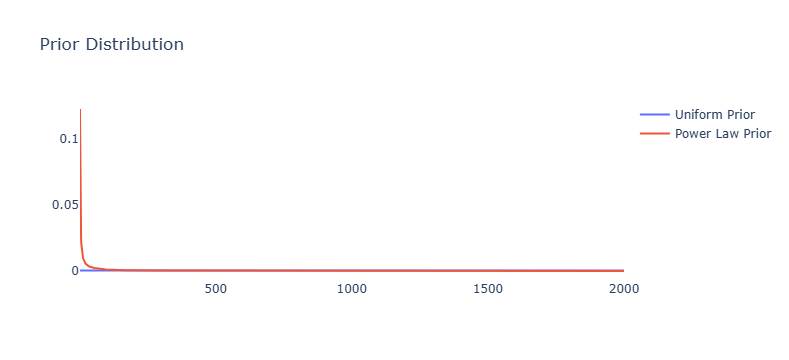

In [53]:
dfu['prior_normalize'] = dfu['prior']/dfu['prior'].sum()

fig = go.Figure()


fig.add_trace(
    go.Line(
        x=dfu.index.to_numpy(),
        y=dfu['prior_normalize'],
        name='Uniform Prior'
    )
)

fig.add_trace(
    go.Line(
        x=dfp.index.to_numpy(),
        y=dfp['prior'],
        name='Power Law Prior'
    )
)

fig.update_layout(
    title='Prior Distribution',
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

/home/lucky/anaconda3/envs/python311/lib/python3.11/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




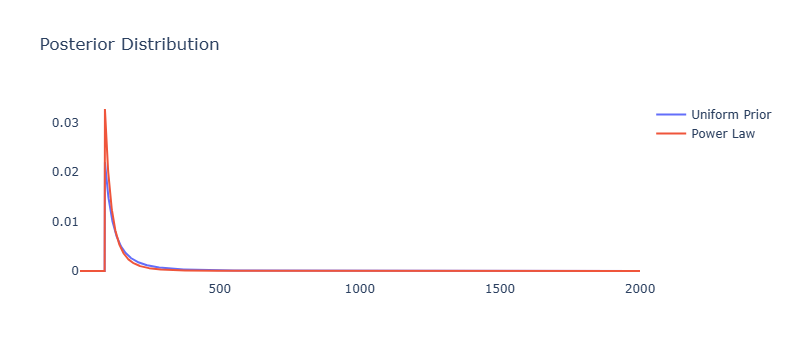

In [54]:
fig = go.Figure()
fig.add_trace(
    go.Line(x = dfu.index,
            y = dfu['posterior'],
            mode='lines',
            name='Uniform Prior'
           )
    )

fig.add_trace(
    go.Line(
        x=dfp.index,
        y=dfp['posterior'],
        mode='lines',
        name='Power Law'
    )
)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    title='Posterior Distribution'
)

fig.show()

The power law gives less prior probability to high values, which yields lower posterior means, and less sensitivity to the upper bound. **With an arbitrarily large upper bound, the mean converges on 134**

#### Highest Posterior Probability (the MAP)

In [55]:
dfp.idxmax()

prior         1.0
posterior    90.0
dtype: float64

In [56]:
dfu.idxmax()

prior               1
posterior          90
prior_normalize     1
dtype: int64

## Credible Intervals

So far we have seen two ways to summarize a posterior distribution:
- the value with the highest posterior probability (the MAP, Maximum a Posteriori Probability)
- the posterior mean

These are both **point estimates**, that is, single value that estimate the quantity we are interested in. Another way to summarize a posterior distribution is with **percentiles**.

In [57]:
q = dfp['posterior'].quantile(q=0.25)
q

np.float64(3.372001841779249e-07)

In [58]:
def quantile(pmf, prob):
    total = 0
    # q = quantity, p=probability
    for q, p in pmf.items():
        total += p
        if total >= prob:
            return q
    return np.nan

In [59]:
# median = 50th quantile
quantile(dfp['posterior'].sort_index(), 0.5)

113.0

In [60]:
q5 = quantile(dfp['posterior'].sort_index(), 0.05)
q95 = quantile(dfp['posterior'].sort_index(), 0.95)

print(q5), print(q95)

91.0
243.0


(None, None)

The result is the interval from 91 to 243 trains, which implies:
- The probability is 5% that the number of trains is less than or equal to 91
- The probability is 5% that the number of trains is greater than 243

Therefore the probability is 90% that the number of trains falls between 91 and 243 (excluding 91 and 243). For this reason, this interval is called a 90% **credible interval**

In [61]:
dfp.quantile(q=0.05)

prior        6.435293e-05
posterior    1.374275e-07
Name: 0.05, dtype: float64

In [25]:
stats.randint(low=1, high=7).pmf([1,2,3,4,5,6])

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])